## Hard vs Soft 

In [1]:
from modules.linearcode import * 
from modules.aux_functions import * 
from scipy import special
import numpy as np
import math
import time

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

In [16]:
def simulate(G_matrix, N = 10**5):
    init_time = time.time()

    # Cria o objeto com a matriz de decodificação
    code = LinearCode(G_matrix)

    # Número de bits a ser transmitida
    n_symbols_sequence = N * code.G.shape[0] #símbols

    # Potências que serão usadas para aplicar os erros no canal
    Eb_N0_dB = np.linspace(0, 11, 10) #multiple Eb/N0 values

    Ec_N0_dB = Eb_N0_dB - 10 * math.log(code.G.shape[1] / code.G.shape[0], 10)

    #Armazena os valores dos erros para cada umas das potências
    num_error_soft_decision = []
    num_error_hard_decision = []

    for Ec_N0_dB_value in Ec_N0_dB:
        # Sinal transmitido
        tx_signal = np.round(np.random.rand(1,n_symbols_sequence))[0]

        # Aplica os bits de paridade nos bits de informação
        tx_signal_enconded = code.enconder(tx_signal)

        # Aplica a modulação BPSK
        tx_signal_enconded_BPSK = code.modulation_BPSK(tx_signal_enconded)

        # Adiciona rúido gaussiano branco ao canal
        rx_signal = code.add_RAGB(tx_signal_enconded_BPSK, mu_AWGN=0, sigma_AWGN=1, EcN0dBs=Ec_N0_dB_value)

        ## Decoficação por Soft Decision
        rx_signal_softdecoder = code.decoderAWGN(rx_signal)

        ## Decoficação por Hard Decision
        rx_signal_harddecoder = code.decoderBSC(rx_signal)

        ## Verifica a ocorrencia de erro no sinal
        # Erro soft decision
        num_error_soft_decision.append(sum(((tx_signal - rx_signal_softdecoder) != 0)))
        num_error_hard_decision.append(sum(((tx_signal - rx_signal_harddecoder) != 0)))


    theoryBer = 0.5 * special.erfc(np.sqrt(10**(Eb_N0_dB/10)))

    simBer_soft = np.array(num_error_soft_decision)/n_symbols_sequence
    simBer_hard = np.array(num_error_hard_decision)/n_symbols_sequence

    print(f"The excution time was {time.time() - init_time:.2f} seconds")
    
    return Eb_N0_dB, theoryBer, simBer_soft, simBer_hard, code.G.shape, n_symbols_sequence

def show_and_save(data):
    Eb_N0_dB = data[0]
    theoryBer = data[1]
    simBer_soft = data[2]
    simBer_hard = data[3]
    G_shape = data[4]
    N = data[5]
    
    plt.figure(figsize=(15,8))
    plt.semilogy(Eb_N0_dB, theoryBer, 'bo', Eb_N0_dB, theoryBer,'b')
    plt.semilogy(Eb_N0_dB, theoryBer, 'bo', label='Theory - Uncoded')
    plt.semilogy(Eb_N0_dB, simBer_hard, 'mo', Eb_N0_dB, simBer_hard, 'm')
    plt.semilogy(Eb_N0_dB, simBer_hard, 'mo', label=f"Simulation - Linear Code ({G_shape[1]},{G_shape[0]}) (HARD)")
    plt.semilogy(Eb_N0_dB, simBer_soft, 'ro', Eb_N0_dB, simBer_soft, 'r')
    plt.semilogy(Eb_N0_dB, simBer_soft, 'ro', label=f'Simulation - Linear Code ({G_shape[1]},{G_shape[0]}) (SOFT)')
    plt.xlabel(r"$E_b/N_o (dB)$")
    plt.ylabel("Bit Error Rate")
    plt.title(f"Comparison between error correcting codes using Hard decision and Soft decision. (N = {N:.0e} symbols)")
    
    plt.gca().set_xlim(left=0, right=10)
    plt.gca().set_ylim(bottom=10**-5)

    plt.legend()

    plt.savefig(f"./images/code_{G_shape[1]}_{G_shape[0]}_{N:.0e}sym_{len(Eb_N0_dB)}pnts.png", dpi = 300, bbox_inches='tight')

    plt.show()

In [9]:
# Define a matriz geradora que será usada para codificar a informação (6,3)
G_6_3 = np.array([[0,1,1,1,0,0],
                  [1,0,1,0,1,0],
                  [1,1,0,1,0,1]]) # Matriz geradora
data_6_3 = simulate(G_6_3, N= 10 **5)

The excution time was 134.15 seconds


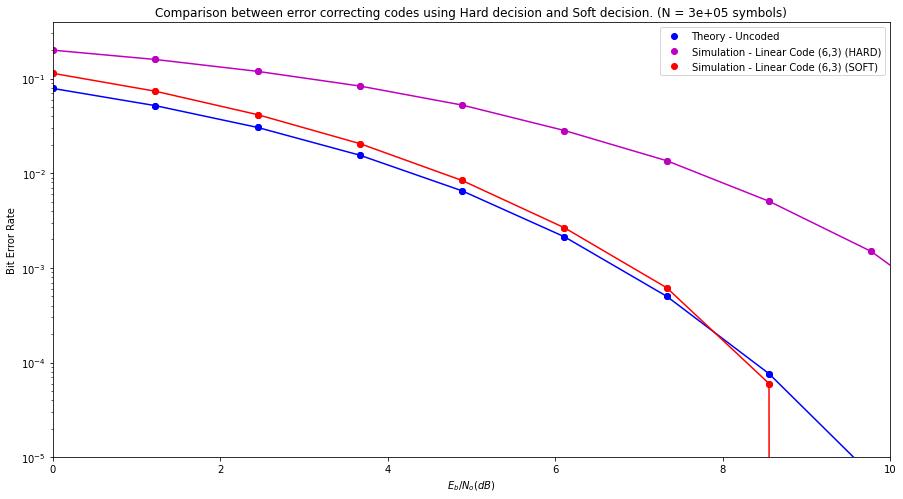

In [17]:
show_and_save(data_6_3)

In [11]:
# Define a matriz geradora que será usada para codificar a informação (7,4)
G_7_4 = np.array([[1,0,1,1,0,0,0],
                  [1,1,1,0,1,0,0],
                  [1,1,0,0,0,1,0],
                  [0,1,1,0,0,0,1]]) # Matriz geradora
data_7_4 = simulate(G_7_4 , N= 10 **5)

The excution time was 147.83 seconds


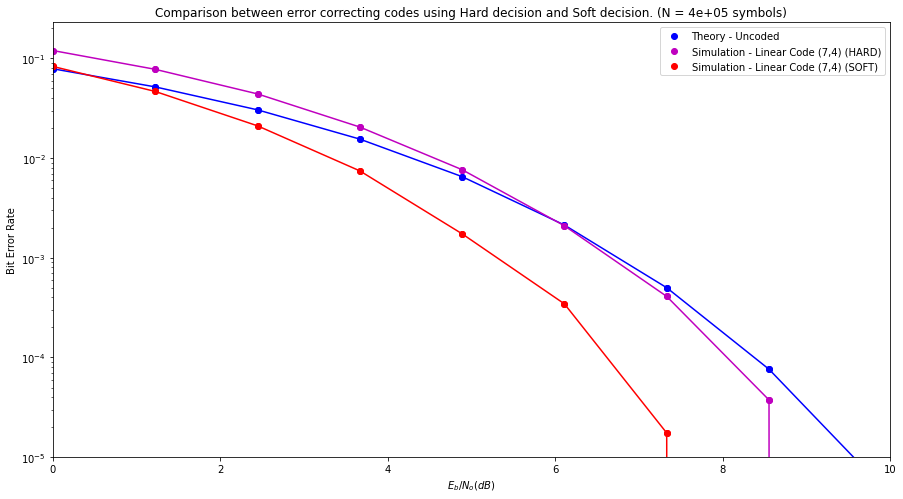

In [18]:
show_and_save(data_7_4)

In [13]:
# Define a matriz geradora que será usada para codificar a informação (8,4)
G_8_4 = np.array([[0,1,1,1,1,0,0,0],
                  [1,1,1,0,0,1,0,0],
                  [1,1,0,1,0,0,1,0],
                  [1,0,1,1,0,0,0,1]]) # Matriz geradora
data_8_4 = simulate(G_8_4 , N= 10 **5)

The excution time was 263.08 seconds


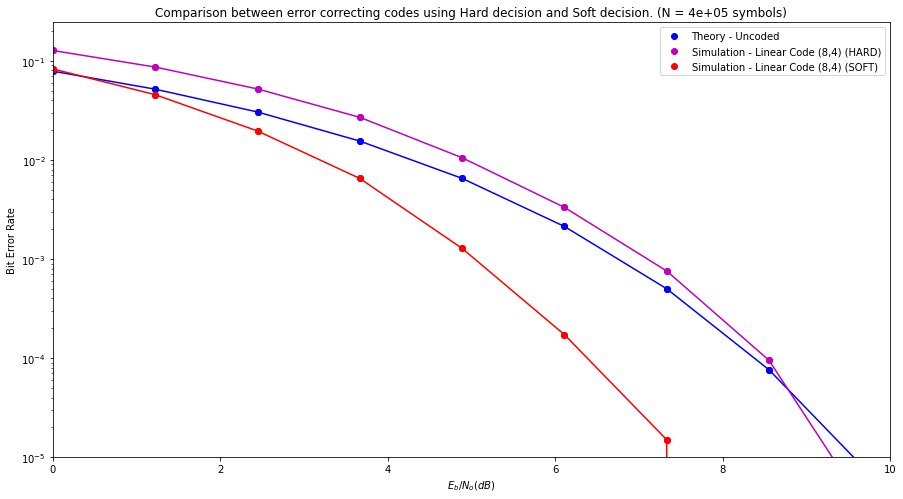

In [19]:
show_and_save(data_8_4)

The excution time was 1322.39 seconds


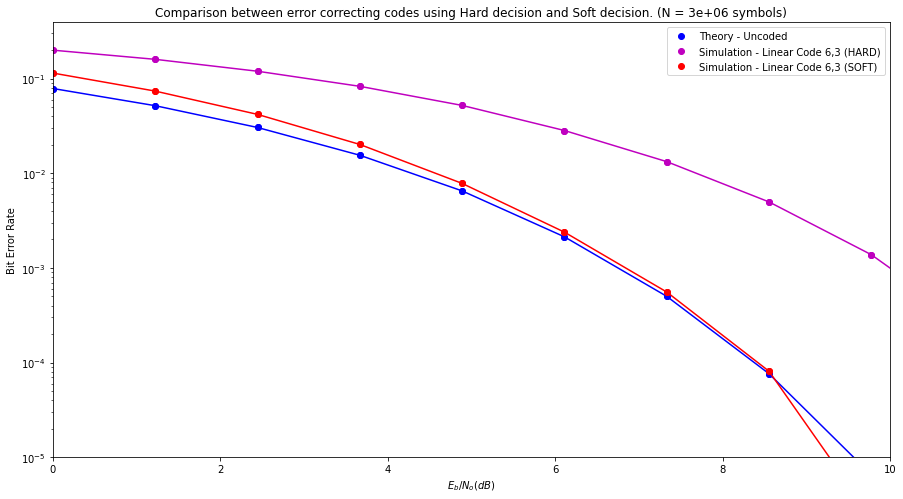

The excution time was 1413.17 seconds


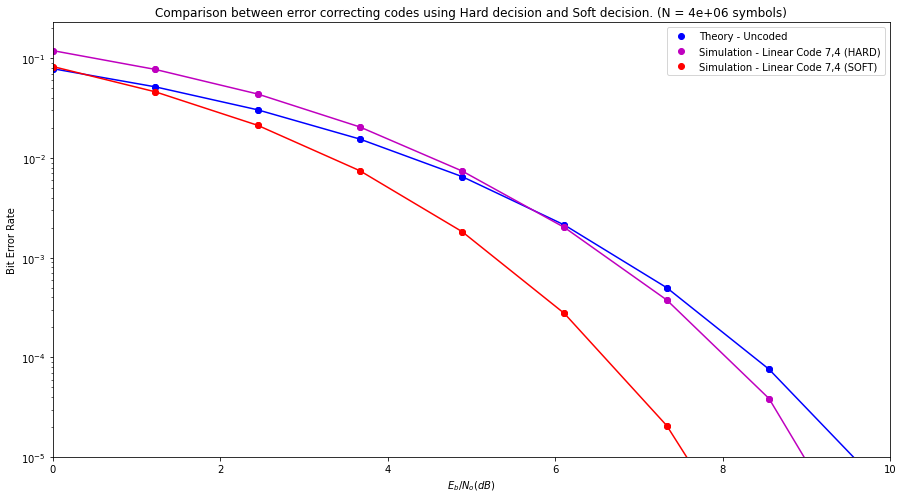

The excution time was 2682.54 seconds


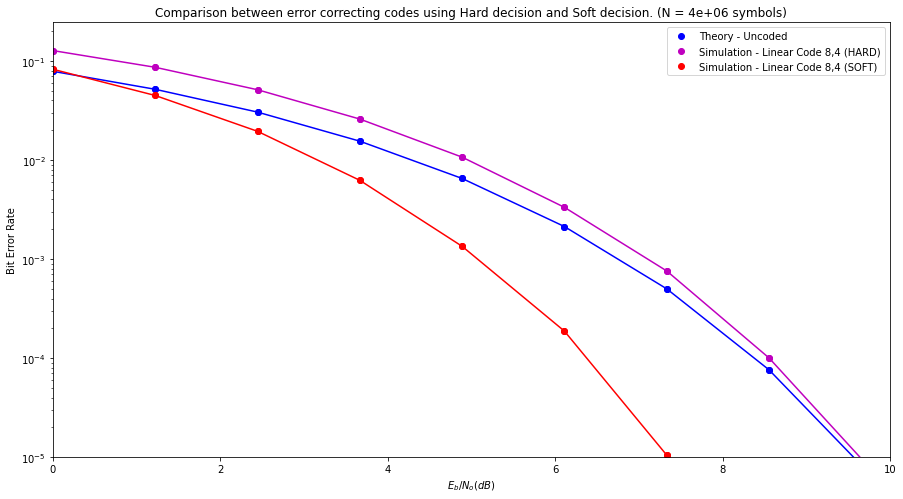

In [15]:
data_6_3_2 = simulate(G_6_3 , N= 10 **6)


data_7_4_2 = simulate(G_7_4 , N= 10 **6)


data_8_4_2 = simulate(G_8_4 , N= 10 **6)


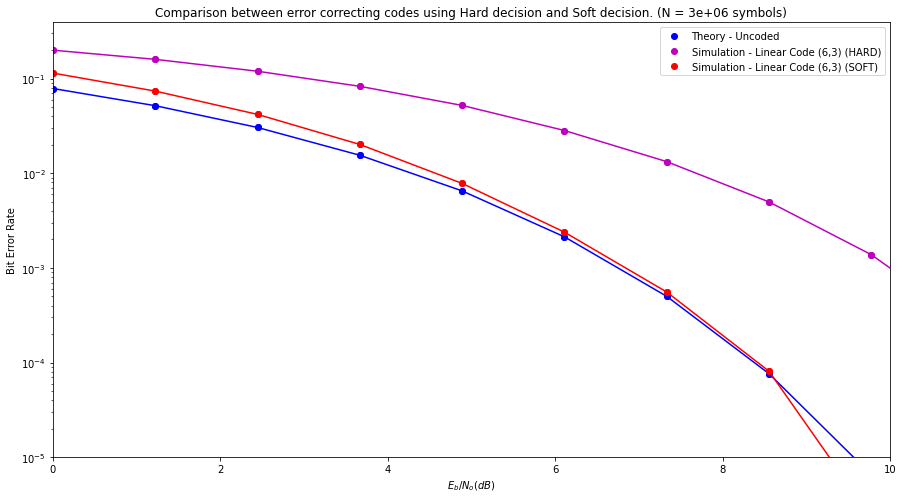

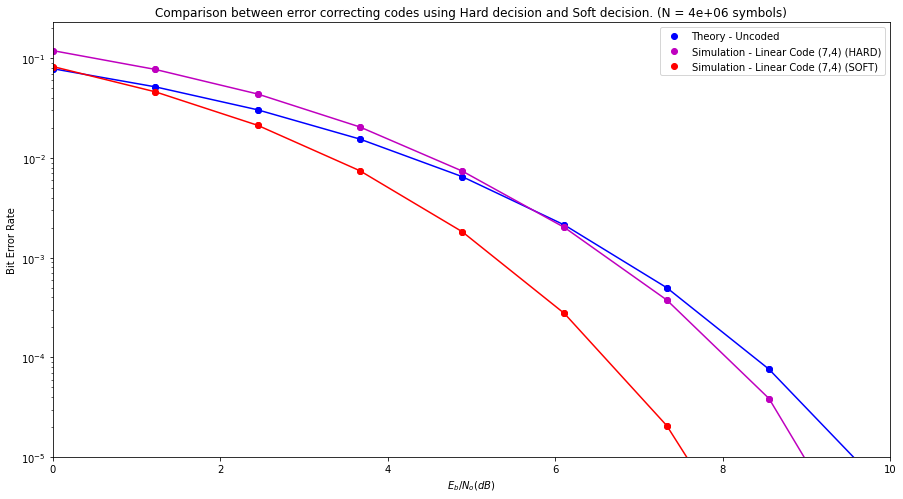

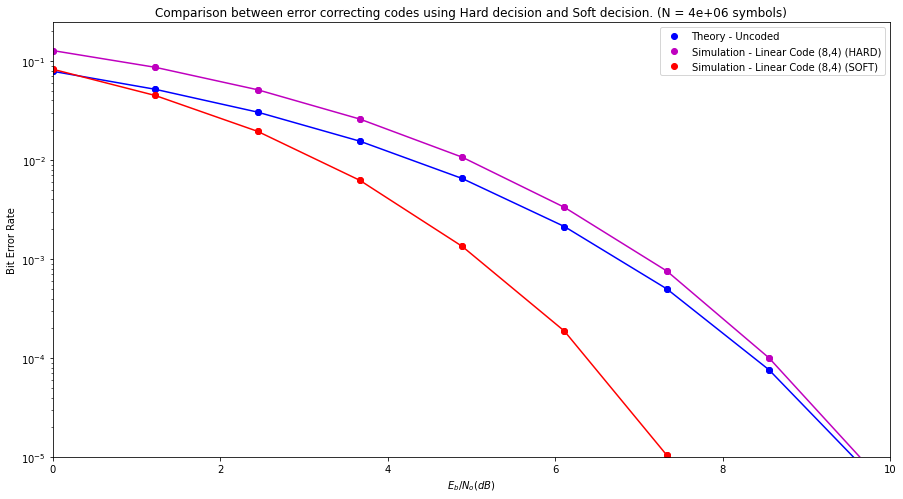

In [20]:
show_and_save(data_6_3_2)
show_and_save(data_7_4_2)
show_and_save(data_8_4_2)